**Название проекта:** Отток клиентов

**Формулировка задачи**

Из «Бета-Банка» стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Имеются исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*- меры, нужно довести метрику до 0.59, проверить *F1*- меру на тестовой выборке .

Дополнительно нужно измерять метрику *AUC-ROC*, сравнить её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Содержание**<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подгрузка-библиотек-и-модулей" data-toc-modified-id="Подгрузка-библиотек-и-модулей-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подгрузка библиотек и модулей</a></span></li><li><span><a href="#Загрузка-и-обзор-датасета" data-toc-modified-id="Загрузка-и-обзор-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и обзор датасета</a></span></li><li><span><a href="#Приведение-названий-столбцов-в-приемлемый-вид" data-toc-modified-id="Приведение-названий-столбцов-в-приемлемый-вид-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Приведение названий столбцов в приемлемый вид</a></span></li><li><span><a href="#Заполнение-пропусков-в-столбце-Tenure" data-toc-modified-id="Заполнение-пропусков-в-столбце-Tenure-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Заполнение пропусков в столбце Tenure</a></span></li><li><span><a href="#Удаление-малоинформативных-признаков" data-toc-modified-id="Удаление-малоинформативных-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Удаление малоинформативных признаков</a></span></li><li><span><a href="#Использование-прямого-кодирования-для-преобразования-категориальных-признаков" data-toc-modified-id="Использование-прямого-кодирования-для-преобразования-категориальных-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Использование прямого кодирования для преобразования категориальных признаков</a></span></li><li><span><a href="#Отделение-целевого-признака-из-датасета" data-toc-modified-id="Отделение-целевого-признака-из-датасета-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Отделение целевого признака из датасета</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Разделение-датасета-на-тренировочную,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-датасета-на-тренировочную,-валидационную-и-тестовую-выборки-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Разделение датасета на тренировочную, валидационную и тестовую выборки</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-дисбаланса-классов" data-toc-modified-id="Исследование-дисбаланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование дисбаланса классов</a></span></li><li><span><a href="#Исследование-моделей-без-учета-дисбаланса-классов" data-toc-modified-id="Исследование-моделей-без-учета-дисбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование моделей без учета дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#Решающее-древо" data-toc-modified-id="Решающее-древо-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Решающее древо</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Балансировка-данных" data-toc-modified-id="Балансировка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Балансировка данных</a></span></li><li><span><a href="#Обучение-моделей-на-сбалансированных-объектах" data-toc-modified-id="Обучение-моделей-на-сбалансированных-объектах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей на сбалансированных объектах</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Вывод-по-проекту" data-toc-modified-id="Вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод по проекту</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Подготовка данных

## Подгрузка библиотек и модулей

In [1]:
# Загрузим необходимые библиотеки и инструменты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Модели

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Инструменты для подготовки данных

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Метрики

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

## Загрузка и обзор датасета

In [2]:
# Загружаем исходный набор данных

data = pd.read_csv('Churn.csv')

In [3]:
# Осматриваем наш фронт работы

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Для дополнительного анализа данных вызываем методы describe... 

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# ... и info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Выводы по первичному изучению данных

Датафрейм состоит из 10000 строк и 14 столбцов. Изменений формата данных не требуется. Артефактов не отмечено. 
    
Столбцы содержат следующие сведения:
    
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка. Имеются пропуски, которые можно заполнить медианным значением.
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Exited — факт ухода клиента (данный столбец содержит в себе целевой признак)
</div>

# Предобработка данных

## Приведение названий столбцов в приемлемый вид

In [6]:
# Получим список названий столбцов 

data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Для удобства работы названия столбцов переведем в нижний регистр, в качестве разделителя слов сделаем нижнее подчеркивание

data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [8]:
# Проверяем результат

data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Заполнение пропусков в столбце Tenure

In [9]:
# Для начала категоризируем объеты по квартилям в столбце estimated_salary с помощью функции pd.qcut()
# и создаем новый категориальный признак с категорией дохода

data['income_cat'] = pd.qcut(data['estimated_salary'], 4, labels=["низкий", "средний", "выше среднего", "высокий"])

In [10]:
# Теперь заполняем пропуски по недвижимости с учетом группировки по категории дохода

data['tenure'] = data['tenure'].fillna(data.groupby('income_cat')['estimated_salary'].transform('median'))

In [11]:
# Проверяем наличие пропусков в столбце

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   row_number        10000 non-null  int64   
 1   customer_id       10000 non-null  int64   
 2   surname           10000 non-null  object  
 3   credit_score      10000 non-null  int64   
 4   geography         10000 non-null  object  
 5   gender            10000 non-null  object  
 6   age               10000 non-null  int64   
 7   tenure            10000 non-null  float64 
 8   balance           10000 non-null  float64 
 9   num_of_products   10000 non-null  int64   
 10  has_cr_card       10000 non-null  int64   
 11  is_active_member  10000 non-null  int64   
 12  estimated_salary  10000 non-null  float64 
 13  exited            10000 non-null  int64   
 14  income_cat        10000 non-null  category
dtypes: category(1), float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Удаление малоинформативных признаков

In [12]:
# Для упрощения задачи моделям машинного обучения уберем из датасета малоинформативные признаки

data = data.drop(['row_number', 'customer_id', 'surname'], axis = 1)

In [13]:
# Проверим результат

data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,income_cat
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,выше среднего
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,выше среднего
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,выше среднего
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,средний
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,средний


## Использование прямого кодирования (one-hot encoding) для категориальных признаков

In [14]:
# Формируем новый датасет, в котором будет произведено прямое кодирование признаков в столбцах gender и geography

data_ohe = pd.get_dummies(data, drop_first=True)

In [15]:
# Проверяем результаты работы

data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male,income_cat_средний,income_cat_выше среднего,income_cat_высокий
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0,1,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0,1,0,0


## Отделение целевого признака

In [16]:
# Получаем признаки датасета путем отбрасывания целевого признака в столбце exited

features = data_ohe.drop(['exited'], axis = 1)

In [17]:
# Проверяем результат

features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,income_cat_средний,income_cat_выше среднего,income_cat_высокий
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,1,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0,1,0,0


In [18]:
# В отдельную переменную выделяем целевой признак

target = data_ohe['exited']

## Масштабирование признаков

In [19]:
# Отдельным объектом сохраняем модуль для масштабирования цифровых признаков

scaler = StandardScaler()

In [20]:
# Отключаем предупреждения

pd.options.mode.chained_assignment = None

In [21]:
# Сохраняем в отдельную переменную список названий столбцов, сотдержащих числовые признаки

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary']

In [22]:
# Обучаем scaler...

scaler.fit(features[numeric])

StandardScaler()

In [23]:
# ... и применяем его к датасету с признаками

features[numeric]= scaler.transform(features[numeric])

In [24]:
# Проверяем результат

features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,income_cat_средний,income_cat_выше среднего,income_cat_высокий
0,-0.326221,0.293517,-0.272999,-1.225848,-0.911583,0.646092,0.970243,0.021886,0,0,0,0,1,0
1,-0.440036,0.198164,-0.273029,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,1,0,0,1,0
2,-1.536794,0.293517,-0.272817,1.333053,2.527057,0.646092,-1.030670,0.240687,0,0,0,0,1,0
3,0.501521,0.007457,-0.273029,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,0,0,1,0,0
4,2.063884,0.388871,-0.272999,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,1,0,1,0,0


### Разделение датасета на тренировочную, валидационную и тестовую выборки

In [25]:
# Разделим исходную совокупность на тренировочную, валидационную и тестовую в соотношении 3:1:1. Сначала отделяем 20 5 для тестовой выборки.

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.4, random_state = 12345)

In [26]:
# Теперь датасеты _eighty разбиваем на _train (75 % от _eighty = 60 % от исходного датасета) и _test (25 % от _eigty = 20 % от исходного датасета)

features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size = 0.5, random_state = 12345)

In [27]:
# Проверяем размер обучающего датасета

features_train.shape

(6000, 14)

In [28]:
# Валидационный набор 

features_valid.shape

(2000, 14)

In [29]:
# И проверка тестовой выборки 

features_test.shape

(2000, 14)

## Вывод по разделу

В данном разделе были совершены следующие действия:
    
- загружены необходимые библиотеки и инструменты для работы с данными. Отключены оповещения системы для "разгрузки" рабочего пространства тетрадки;
- вызван исходный датасет, исследован его состав, дано описание содержимого;
- столбцы датафрейма переназваны с целью приведения наименований к стандартному виду, удобному для работы;
- пропуски в столбце tenure заменены медианным значением;
- с помощью порядкового кодирования содержимое датасета приведено к единому числовому формату;
- данные таблицы разбиты на два датафрейма - признаки и целевой признак;
- исходные сведения разделены на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1. Сохранен дополнительно датасет, содержащий в себе и тренировочную, и валидационную части для обучения моделей на большем количестве данных перед тестированием для повышения качества моделей.

# Исследование данных

## Исследование дисбаланса классов

Для того, чтобы определить масштабы разбалансированности классов в датасете, выделим "положительные" и "отрицательные" классы в данных

In [30]:
# Отбираем отрицательные объекты в признаках и выводим их количество

features_zeros = features[target == 0]
features_zeros.shape

(7963, 14)

In [31]:
# То же с положительными

features_ones = features[target == 1]
features_ones.shape

(2037, 14)

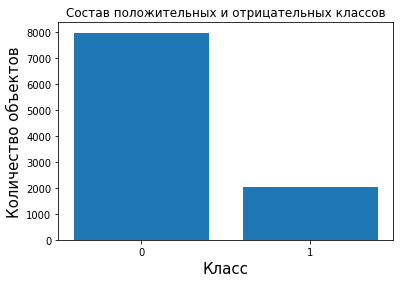

In [32]:
# Для удобства восприятия построим bar chart

classes = ['0', '1']
volume = [features_zeros.shape[0], features_ones.shape[0]]

plt.bar(classes, volume)

plt.title('Состав положительных и отрицательных классов')
plt.xlabel('Класс', fontsize=15)
plt.ylabel('Количество объектов', fontsize=15)
plt.show()

In [33]:
# Считаем, во сколько раз количество отрицательных признаков больше, чем положительных

features_zeros.shape[0]/features_ones.shape[0]

3.9091801669121256

**Вывод по проверке баланса данных**
    
Из результатов видно, что положительных объектов в 3,9 раза меньше, чем отрицательных. Налицо дисбаланс классов. В дальнейшем можно будет применить метод upsampling для балансировки данных.

</div>

## Исследование моделей без учета дисбаланса классов

### Решающее древо

In [34]:
# Обучаем и проверяем модель решающего дерева. Для подбора лучших гиперпараметров применим цикл, который будет перебирать 
# значения max_depth и min_samples_leaf

best_f1 = 0

for depth in range(1, 20):
    for leafs in range(1, 20):

            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leafs) 
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
           
            f1 = f1_score(target_valid, predicted_valid)

            if f1 > best_f1:
                best_depth = depth
                best_leafs =leafs
                best_f1 = f1

f1_tree_val_unbalanced = best_f1
print('Best depth = {}, best leafs = {}, best f1 = {:.4f}'.format(best_depth, best_leafs, best_f1))


Best depth = 6, best leafs = 3, best f1 = 0.5770


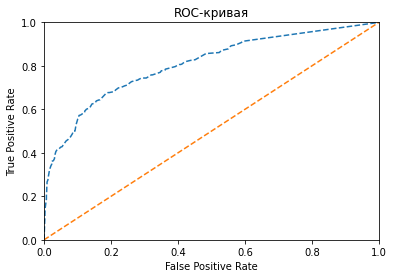

Значение метрики auc_roc = 0.8059


In [35]:
# Посчитаем значение метрики AUC-ROC, построим соответствующую кривую в сравнении с той же метрикой для случайной модели

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_tree_val_unbalanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

### Случайный лес

In [36]:
# Обучаем и проверяем модель случайного леса. Для подбора лучших гиперпараметров применим цикл, который будет перебирать 
# значения n_estimators и min_samples_split

best_model = None
best_f1 = 0

for est in range(1, 40):
    for samples in range(2,10):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split = samples) 

        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)


        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_samples = samples
            
f1_forest_val_unbalanced = best_f1
print('Лучшие показатели: f1 = {:.4f}, best_est = {}, best_samples = {}'.format(f1, best_est, best_samples))

Лучшие показатели: f1 = 0.5719, best_est = 12, best_samples = 9


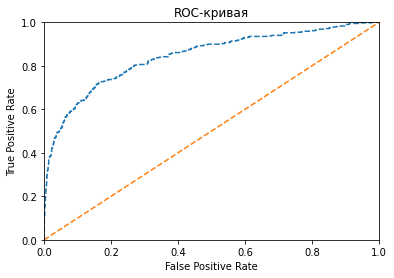

Значение метрики auc_roc = 0.8445


In [37]:
# Посчитаем значение метрики AUC-ROC, построим соответствующую кривую в сравнении с той же метрикой для случайной модели

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_forest_val_unbalanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

### Логистическая регрессия

In [38]:
# Обучаем и проверяем модель логистической регрессии

model = LogisticRegression(random_state = 12345, solver='liblinear')

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

f1 = f1_score(predicted_valid, target_valid)

f1_logreg_val_unbalanced = f1
print('Показатель f1 = {:.4f}'.format(f1))

Показатель f1 = 0.3367


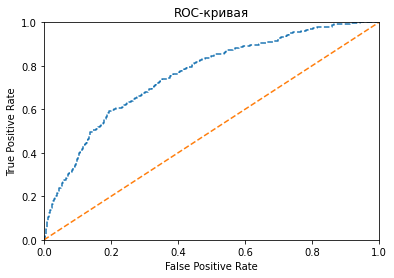

Значение метрики auc_roc = 0.7589


In [39]:
# Посчитаем значение метрики AUC-ROC, построим соответствующую кривую в сравнении с той же метрикой для случайной модели

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_logreg_val_unbalanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

### Таблица промежуточных результатов

In [40]:
table_unbalanced = pd.DataFrame({'ML-модель': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'],
        'F1_valid_unbalanced': [f1_tree_val_unbalanced, f1_forest_val_unbalanced, f1_logreg_val_unbalanced],
        'ROC-AUC_valid_unbalanced': [auc_roc_tree_val_unbalanced, auc_roc_forest_val_unbalanced, auc_roc_logreg_val_unbalanced], 
})

table_unbalanced

,ML-модель,F1_valid_unbalanced,ROC-AUC_valid_unbalanced
0,Решающее дерево,0.577039,0.805940
1,Случайный лес,0.585949,0.844480
2,Логистическая регрессия,0.336700,0.758913


**Вывод по разделу**


На данном этапе проекта было проведено исследование дисбаланса классов в наборе данных. Выявлено, что количество отрицательных объектов приблизительно в 4 раза превышает число положительных. Это говорит о необходимости балансирования данных для получения более высоких показателей качества при работе моделей.

Проведена предварительная "обкатка" моделей решающего дерева (f1 = 0.577039, auc_roc = 0.805940), случайного леса (f1 = 0.585949,  auc_roc = 0.844480) и логистической регрессии (f1 = 0.336700,  auc_roc = 0.758913) на несбалансированных данных. Результаты получились ожидаемо низкими, особенно чувствительной к дисбалансу оказалась логистическая регрессия. 

При этом числовые показатели метрики AUC-ROC отличаются не так кардинально, но все же соответсвуют полученному качеству каждой модели. Самой крутой, что говорит о большем количестве TP ответов, является кривая случайного леса, затем идет решающее дерево, потом логистическая регрессия.

## Балансировка данных

In [41]:
# Для балансировки классов создадим функцию upsample, с помощью которого нарастим число положительных объектов

def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [42]:
# Вызываем полученную функцию и записываем результаты в новые переменные

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [43]:
# Отбираем отрицательные классы в признаках и выводим их количество для проверки

features_zeros = features_upsampled[target == 0]

features_zeros.shape

(4804, 14)

In [44]:
# То же с положительными классами 

features_ones = features_upsampled[target == 1]
features_ones.shape

(4784, 14)

In [45]:
# Повторяем процедуру для отрицительных целевфх признаков

target_zeros = target_upsampled[target == 0]
target_zeros.shape

(4804,)

In [46]:
# То же для положительных

target_ones = target_upsampled[target == 1]
target_ones.shape

(4784,)

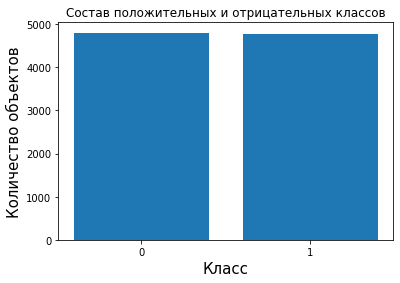

In [47]:
# Построим bar chart

classes = ['0', '1']
volume = [features_zeros.shape[0], features_ones.shape[0]]

plt.bar(classes, volume)

plt.title('Состав положительных и отрицательных классов')
plt.xlabel('Класс', fontsize=15)
plt.ylabel('Количество объектов', fontsize=15)
plt.show()

**Вывод по работе с дисбалансом объектов**
    
После проведенной балансировки соотношение положительных и отрицательных объектов стало близким к значению 1:1. Теперь модели будут лучше учитывать вес каждого объекта.

</div>

## Обучение моделей на сбалансированных объектах

### Решающее дерево

In [48]:
# Обучим решающее дерево на новых тренировочных данных и посмотрим результат

best_depth = None
best_f1 = 0
for depth in range(1, 20):
    for leafs in range(1, 20):

            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leafs) 
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            
            f1 = f1_score(target_valid, predicted_valid)

            if f1 > best_f1:
                best_depth = depth
                best_leafs =leafs
                best_f1 = f1
                
f1_tree_val_balanced = best_f1
print('Best depth = {}, best leafs = {}, best f1 = {:.4f}'.format(best_depth, best_leafs, best_f1))


Best depth = 5, best leafs = 19, best f1 = 0.6010


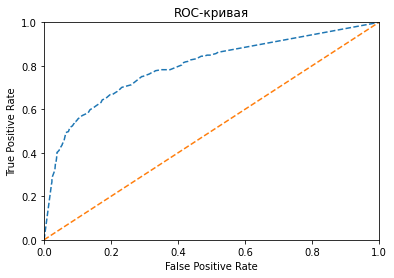

Значение метрики auc_roc = 0.7949


In [49]:
# Посчитаем AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_tree_val_balanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

Видим, что upsampling положительно сказался на модели дерева, удалось снизить глубину и поднять качество


In [50]:
# Для сравнения проведем обучение модели на несбалансированных тренировочных данных, в параметры дерева 
# добавим аргумент class_weight со значением balanced

best_depth = None
best_f1 = 0
for depth in range(1, 20):
    for leafs in range(1, 20):

            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leafs, class_weight='balanced') 
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            
            f1 = f1_score(target_valid, predicted_valid)

            if f1 > best_f1:
                best_depth = depth
                best_leafs =leafs
                best_f1 = f1
print('Best depth = {}, best leafs = {}, best f1 = {:.4f}'.format(best_depth, best_leafs, best_f1))


Best depth = 5, best leafs = 10, best f1 = 0.6010


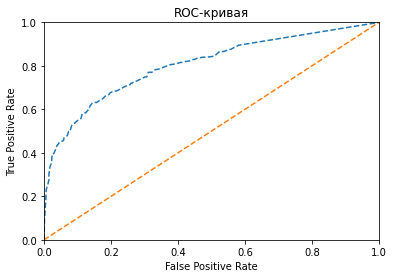

Значение метрики auc_roc = 0.8044


In [51]:
# Посчитаем AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_tree_val_balanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

**Вывод по работе решающего дерева со сбалансированными данными**
    

Работа решающего дерева на сбалансированных данных стала значительно эффективнее, показав лучший результат f1 = 0.6010 против f1 = 0.5770 при дисбалансе. Прогресс налицо, уже достигнут целевой показатель. 

При этом значение AUC-ROC несколько просело по-сравнению с моделью в предыдущем разделе (auc_roc = 0.804364 против auc_roc = 0.805940). Вероятно, это объясняется увеличением положительных ответов за счет наращивания выборки при не таком значительном росте точности модели, что привело к относительному спаду в количестве рейтинга TPR.

Работаем дальше.

### Случайный лес

In [52]:
# Обучим модель случайного леса  на новых тренировочных данных и посмотрим результат

best_model = None
best_f1 = 0

for est in range(1, 20):
    for samples in range(2,20):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split = samples) 

        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)

        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_samples = samples

f1_forest_val_balanced = best_f1
print('Лучшие показатели для данного леса: best_f1 = {:.4f}, best_est = {}, best_samples = {}'.format(best_f1, best_est, best_samples))

Лучшие показатели для данного леса: best_f1 = 0.6225, best_est = 19, best_samples = 16


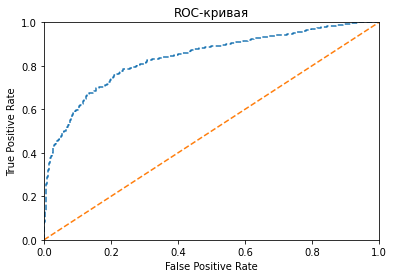

Значение метрики auc_roc = 0.8382


In [53]:
# Посчитаем AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_forest_val_balanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

In [54]:
# Обучим модель случайного леса  на "старых" тренировочных данных c показателем гиперпараметра class_weight = 'balanced' и посмотрим результат

best_model = None
best_f1 = 0

for est in range(1, 20):
    for samples in range(2,20):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split = samples, class_weight='balanced') 

        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)

        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_samples = samples

print('Лучшие показатели для данного леса: best_f1 = {}, best_est = {}, best_samples = {}'.format(best_f1, best_est, best_samples))

Лучшие показатели для данного леса: best_f1 = 0.6266829865361075, best_est = 16, best_samples = 13


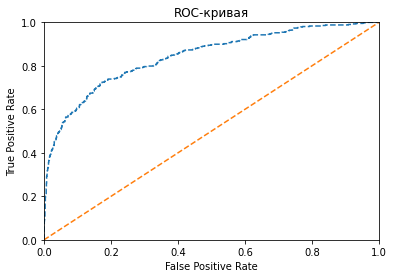

Значение метрики auc_roc = 0.8432


In [55]:
# Посчитаем AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

**Вывод по работе случайного леса со сбалансированными данными**
    
И снова модель, приготовленная на отборных сбалансированных данных дает значительный прирост в показателях. 

Метрика f1 = 0.622532 у новой модели случайного леса против f1 = 0.585949 при дисбалансе - отличная работа, товарищи! Сбалансированные данные в каждый дом! УРА!

Метрика AUC-ROC осталась на высоком уровне (auc_roc = 0.838193 против auc_roc = 0.844480).

### Логистическая регрессия

In [56]:
# Обучим модель случайного леса  на "старых" тренировочных данных c показателем гиперпараметра class_weight = 'balanced' и посмотрим результат

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
f1_logreg_val_balanced = f1_score(target_valid, predicted_valid)

F1: 0.49140893470790376


In [57]:
# Тестируем модель случайного леса c новыми данными и c показателем гиперпараметра class_weight = 'balanced'

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49056603773584906


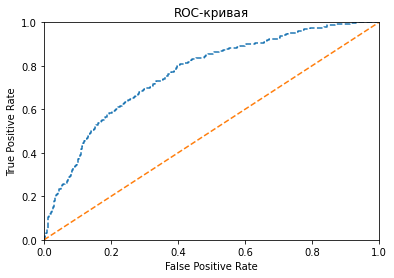

Значение метрики auc_roc = 0.7642


In [58]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_logreg_val_balanced = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

### Таблица промежуточных результатов

In [59]:
table_balanced = pd.DataFrame({'ML-модель': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'],
        'F1_valid_balanced': [f1_tree_val_balanced, f1_forest_val_balanced, f1_logreg_val_balanced],
        'ROC-AUC_valid_balanced': [auc_roc_tree_val_balanced, auc_roc_forest_val_balanced, auc_roc_logreg_val_balanced], 
})

table_balanced

,ML-модель,F1_valid_balanced,ROC-AUC_valid_balanced
0,Решающее дерево,0.601047,0.804364
1,Случайный лес,0.622532,0.838193
2,Логистическая регрессия,0.491409,0.764201


**Вывод по работе логистической регрессии со сбалансированными данными**
    
И только одинокая линейная регрессия тихонько грустит в сторонке. Никак не удается ей набрать даже близкого показателя к ее товарищам. Но она не сдается, улучшив свой результат: f1: 0.491409 на новых данных против f1 = 0.336700 на несбалансированных. Приз зрительских симпатий уходит именно к ней! Но еще есть, над чем работать! При этом показатель AUC-ROC изменился мало: auc_roc = 0.764201 в новом виде против auc_roc = 0.758913 в старом. 

# Тестирование моделей

## Решающее дерево

In [60]:
# Начинаем с решающего древа. Гиперпараметры забираем у лучшей модели из предыдущего раздела. Обучаем на тестовых данных

model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_leaf=19, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)

f1_tree_test = f1

print('Значение метрики f1 = {}'.format(f1_tree_test))

Значение метрики f1 = 0.5866666666666667


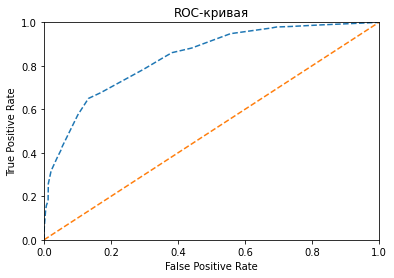

Значение метрики auc_roc = 0.8391


In [61]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_tree_test = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

**Вывод по тестированию решающего дерева**
    
Результаты тестирования обученной на объединенной выборке показывают результат ниже, чем на валидационнойй выборке. Видимо, есть склонность к переобучению! f1 = 0.586667 против f1 = 0.601047. Целевой показатель не достигнут, хоть и подобрались достаточно близко. 

Зато AUC-ROC подрос (0.839050 против 0.804364). 

## Случайный лес

In [62]:
# Теперь на тренировочной выборке

model = RandomForestClassifier(random_state=12345, n_estimators=19,  class_weight='balanced', criterion = 'entropy', min_samples_split=16) 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

f1 = f1_score(target_test, predicted_test)

f1_forest_test = f1

print('Значение метрики f1 = {:.4f}'.format(f1))

Значение метрики f1 = 0.6067


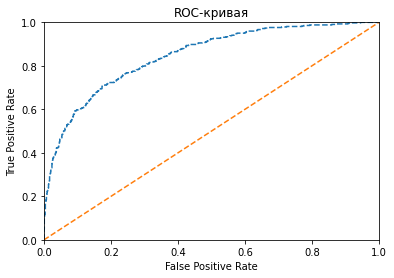

Значение метрики auc_roc = 0.8467


In [63]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_forest_test = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

**Вывод по тестированию случайного леса**
    
Случайный лес продемонстрировал достойный результат, но тоже проявил склонность к переобучению (на тестовой выборке  f1 = 0.606715 против f1 = 0.622535 на валидационной). Целевой показатель достигнут, с этим можно работать. 

Показатель AUC-ROC остался достаточно высоким и даже несколько подрос (auc_roc = 0.846710 против auc_roc = 0.838193). 

## Логистическая регрессия

In [64]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

f1 = f1_score(target_test, predicted_test)

f1_logreg_test = f1

print('Значение метрики f1 = {:.4f}'.format(f1))

Значение метрики f1 = 0.4838


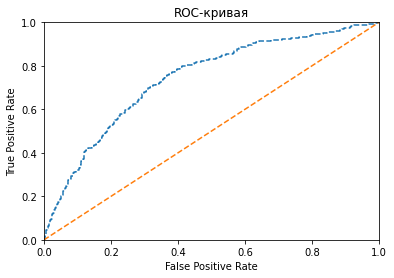

Значение метрики auc_roc = 0.7400


In [65]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

auc_roc_logreg_test = auc_roc

print('Значение метрики auc_roc = {:.4f}'.format(auc_roc))

**Вывод по тестированию логистической регрессии**
    
Логистическая регрессия показала несколько сниженный результат (f1=0.483816 против 0.492281). Целевого показателя достигнуть не удалось. Здесь нужно подключать другие методы. 

Показатель AUC-ROC тоже уменьшился (auc_roc = 0.740049 против auc_roc = 0.764201).
</div>

## Итоговая таблица

In [66]:
# Для наглядности представления результатов наших трудов оформим итоговую таблицу

final_table = pd.DataFrame({'ML-модель': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'],
        'F1_valid_unbalanced': [f1_tree_val_unbalanced, f1_forest_val_unbalanced, f1_logreg_val_unbalanced],
        'F1_valid_balanced': [f1_tree_val_balanced, f1_forest_val_balanced, f1_logreg_val_balanced],
        'F1_test': [f1_tree_test, f1_forest_test, f1_logreg_test],
        'ROC-AUC_valid_unbalanced': [auc_roc_tree_val_unbalanced, auc_roc_forest_val_unbalanced, auc_roc_logreg_val_unbalanced], 
        'ROC-AUC_valid_balanced': [auc_roc_tree_val_balanced, auc_roc_forest_val_balanced, auc_roc_logreg_val_balanced],
        'ROC-AUC_test': [auc_roc_tree_test, auc_roc_forest_test, auc_roc_logreg_test]})

final_table

,ML-модель,F1_valid_unbalanced,F1_valid_balanced,F1_test,ROC-AUC_valid_unbalanced,ROC-AUC_valid_balanced,ROC-AUC_test
0,Решающее дерево,0.577039,0.601047,0.586667,0.805940,0.804364,0.839050
1,Случайный лес,0.585949,0.622532,0.606715,0.844480,0.838193,0.846710
2,Логистическая регрессия,0.336700,0.491409,0.483816,0.758913,0.764201,0.740049


# Вывод по проекту

- В текущем проекте были отработаны навыки загрузки необходимых инструментов обработки данных (библиотеки, метрики, модели машинного обучения), предобработки содержимого датасета (коррекция названий столбцов, заполнение пропусков, использование порядкового кодирования, отделение целевого признака от датасета, масштабирование признаков, разделение данных на тренировочную, валидационную и тестовую выборки).

- Исследован датафрейм с точки зрения баланса классов данных. Указано, что в исходном датасете количество положительных объектов в 4 раза меньше, чем отрицательных. Произведено исследование работы моделей на несбалансированных данных. Показатели моделей: 
        решающее дерево - f1 = 0.577039, auc_roc = 0.805940; 
        случайный лес -  f1 = 0.585949,  auc_roc = 0.844480; 
        логистическая регрессия - f1 = 0.336700,  auc_roc = 0.7589130. 

- Произведена балансировка данных путем наращивания количества положительных классов. Осуществлено обучение моделей на новых данных и их тестирование на валидационной выборке. Показатели полученных моделей:
        решающее дерево - f1 = 0.601047, auc_roc = 0.804364; 
        случайный лес - f1 = 0.622532, auc_roc = 0.838193; 
        логистическая регрессия - f1: 0.492281, auc_roc = 0.764201.

- Модели обучены на объединенных тренировочной выборке, затем проведена проверка на тестовых данных. Показатели моделей:
        решающее дерево - f1 = 0.586667, auc-roc = 0.839050; 
        случайный лес - f1 = 0.606715, auc_roc = 0.846710; 
        логистическая регрессия -  0.483816, auc_roc = 0.740049.

Таким образом, удалось добиться нужных показателей метрики f1 только у случайного леса. Он предпочтительнее для использования в промышленной сфере.